# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
dataset = pd.read_csv('Cancer.csv')

In [3]:
dataset.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
dataset.shape

(699, 11)

In [6]:
dataset['Class'].unique()

array([2, 4], dtype=int64)

In [7]:
dataset.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Almost all the columns are right skewed. Bare nuclei has numerical values but showed as object.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

dataset.isna().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [9]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [10]:
dataset.isnull().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [11]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [12]:
dataset['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [13]:
dataset[dataset['Bare Nuclei']=='?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [14]:
dataset['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [15]:
dataset['Bare Nuclei'].replace('?',"1",inplace=True)

In [16]:
dataset['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [17]:
dataset['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [18]:
dataset['Bare Nuclei']=dataset['Bare Nuclei'].astype('int64')

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [19]:
# Check for correlation of variables

In [20]:
dataset.drop('ID',axis=1,inplace=True)

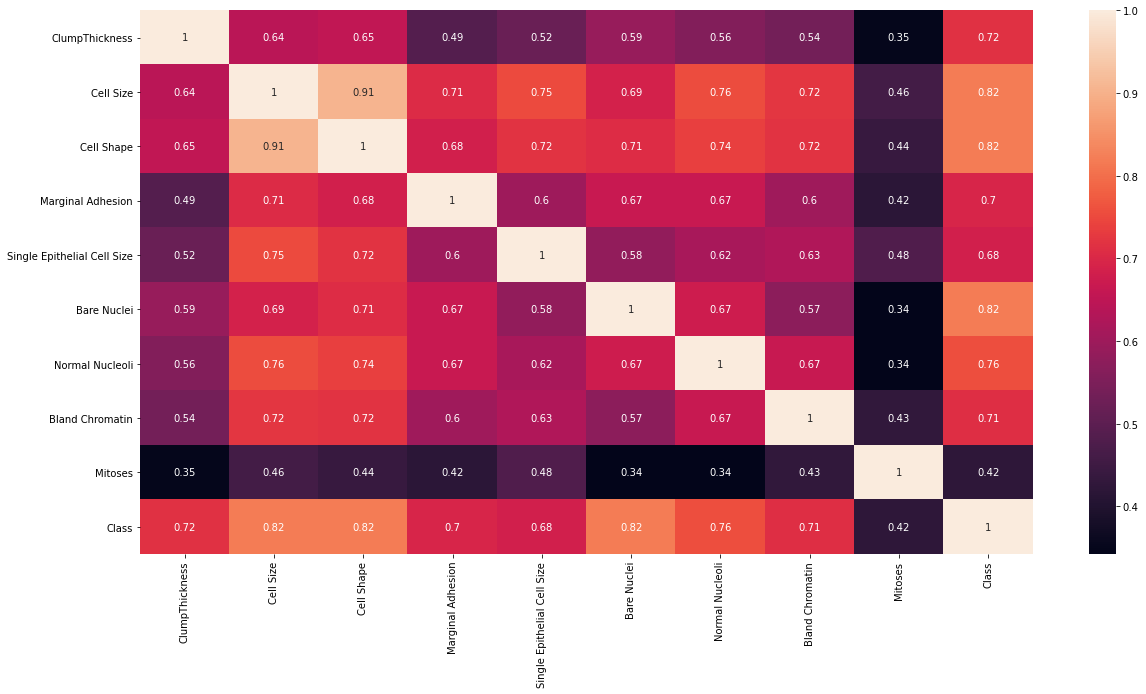

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [22]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [23]:
#Let us check the pair plot

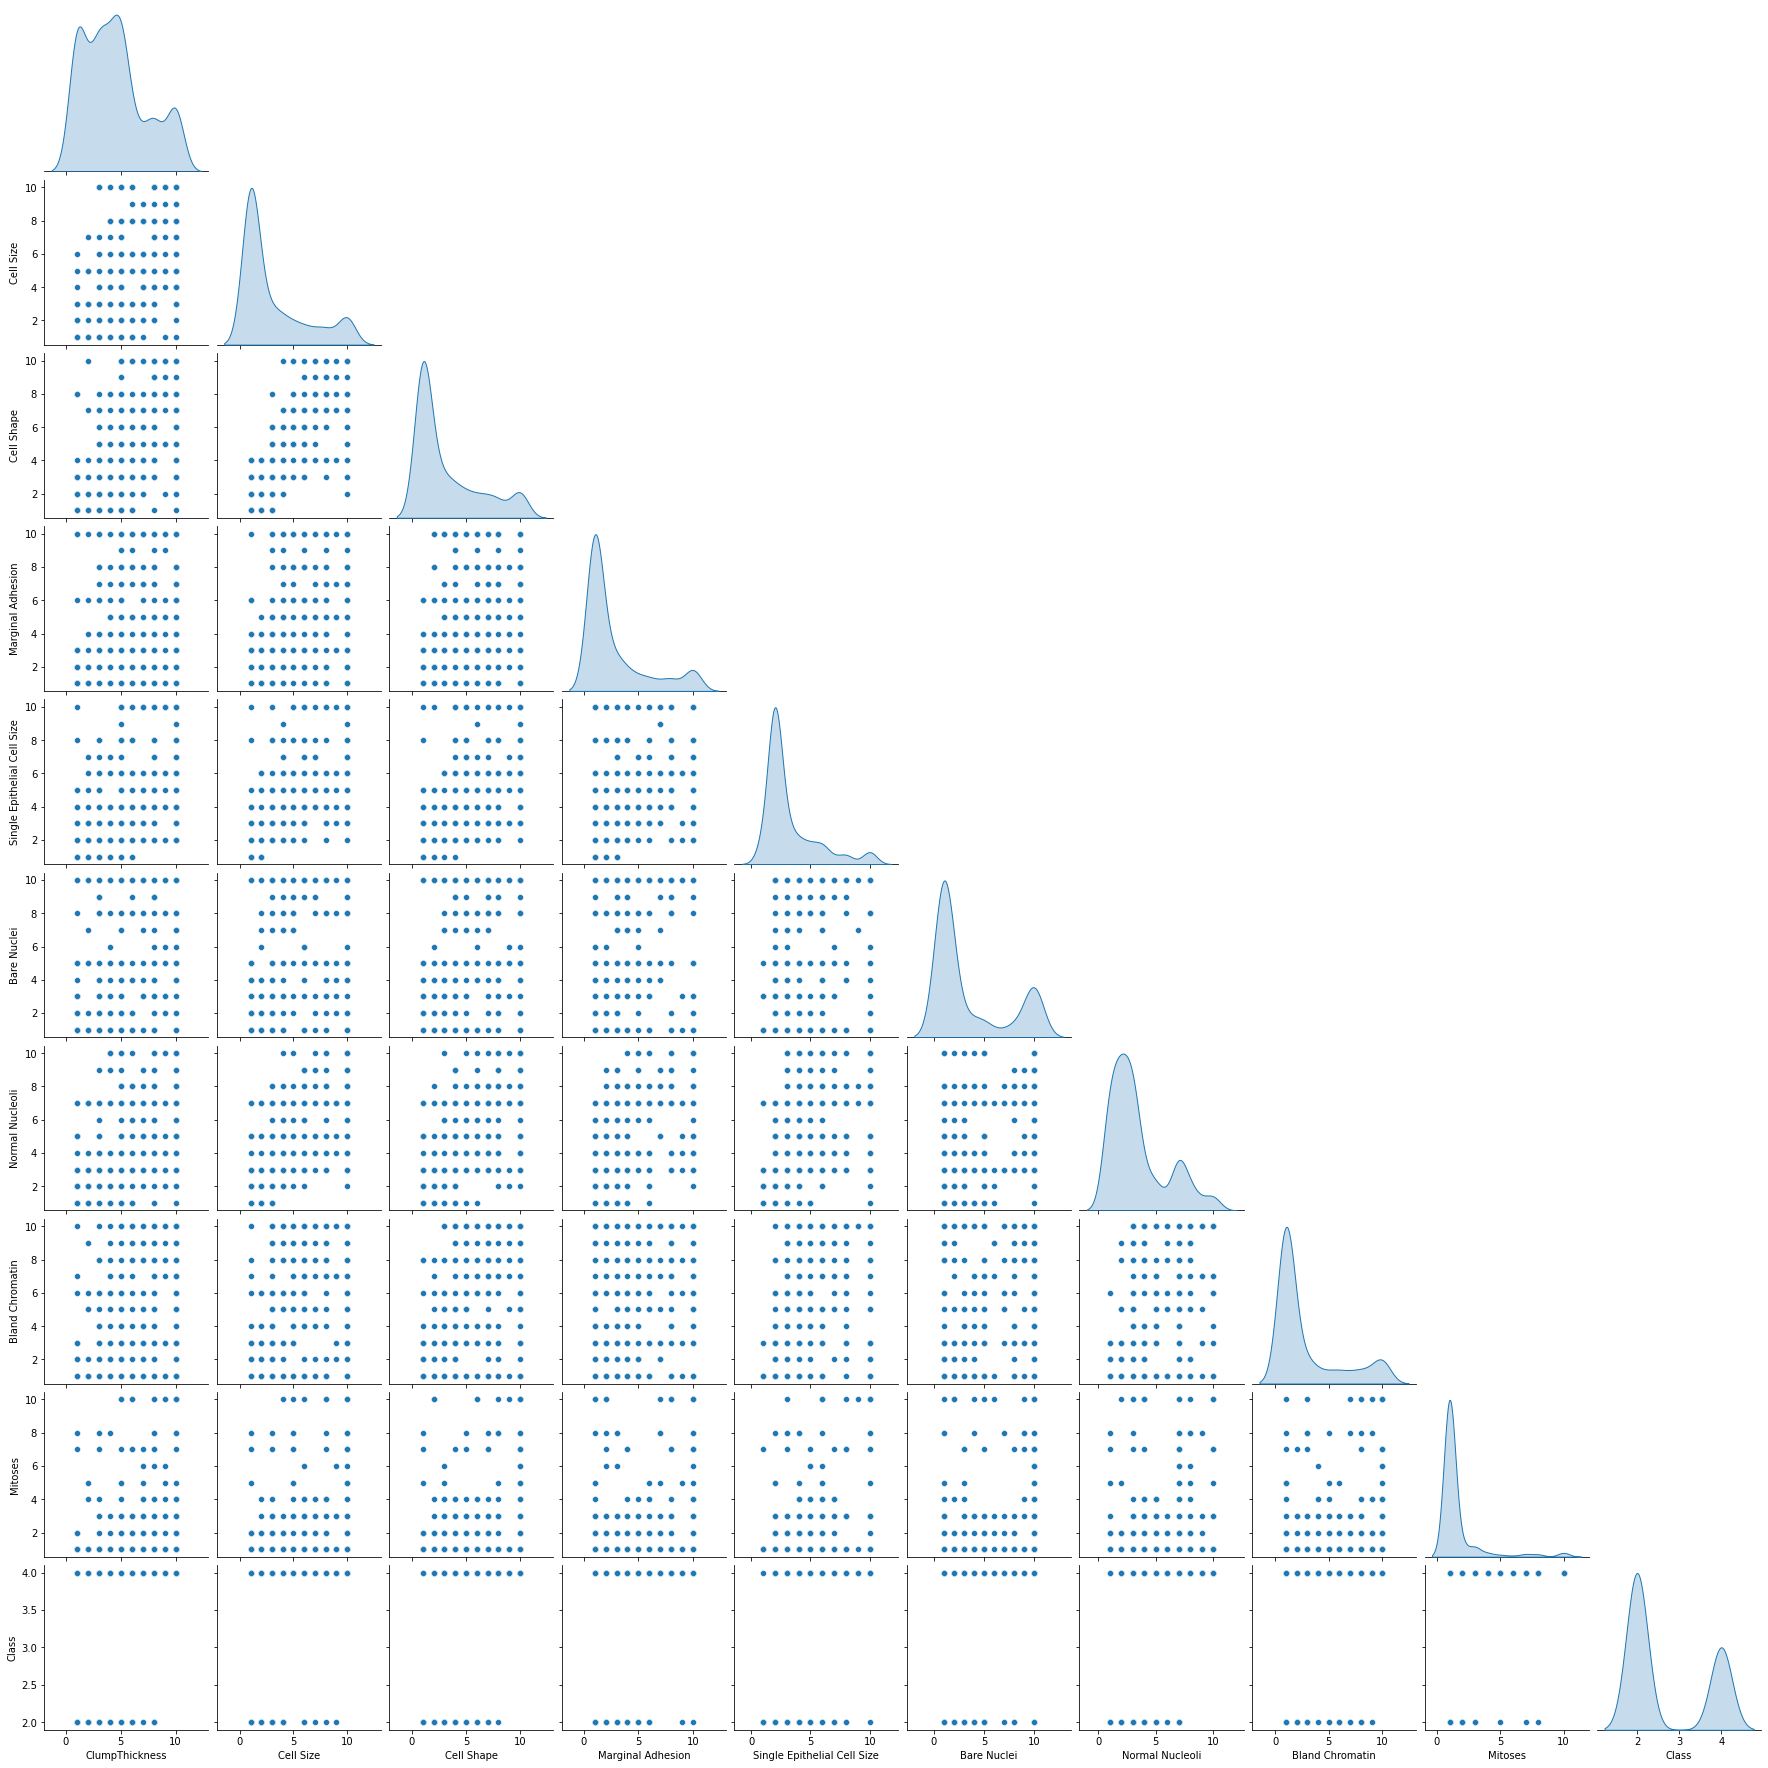

In [24]:
sns.pairplot(data=dataset,diag_kind='kde',corner=True)

In [25]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

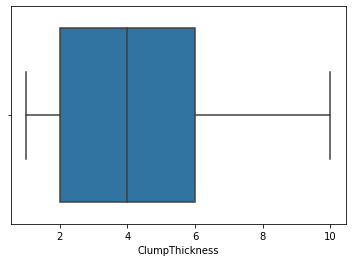

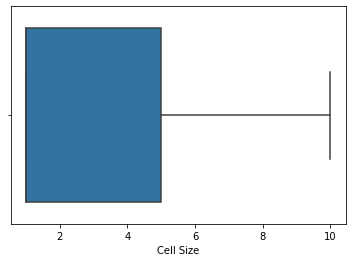

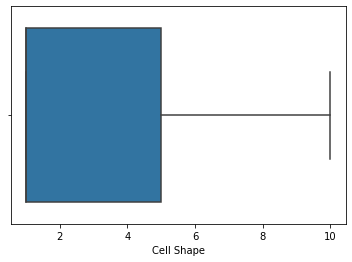

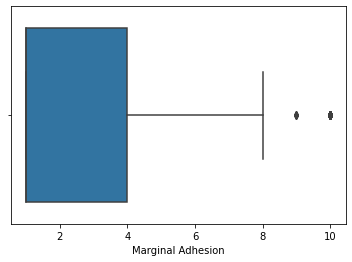

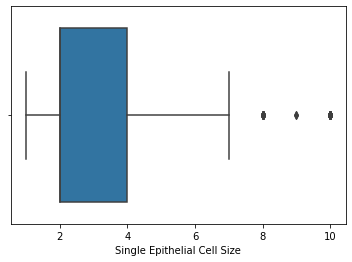

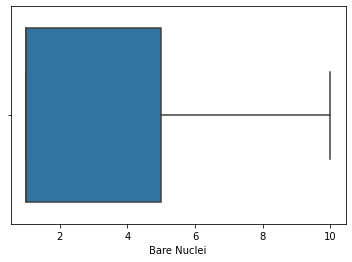

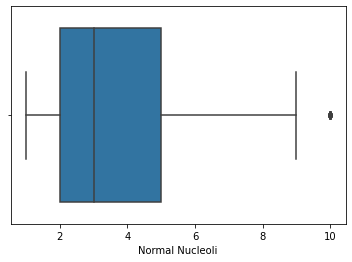

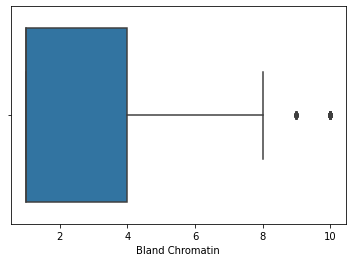

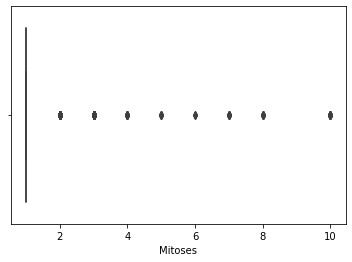

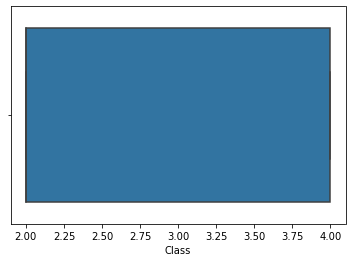

In [26]:
for feature in dataset.columns:
    sns.boxplot(x=feature,data=dataset)
    plt.show()

<AxesSubplot:>

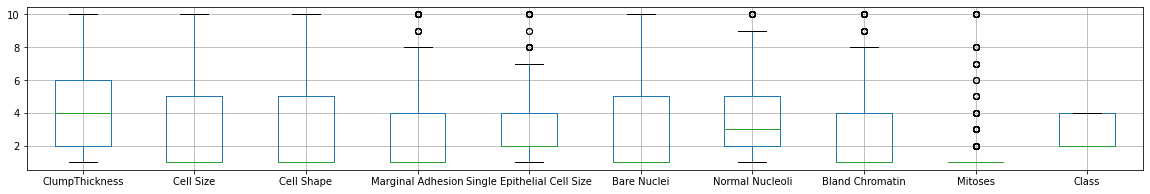

In [27]:
dataset.boxplot(figsize=(20,3))

In [30]:
dataset['Marginal Adhesion'] = np.where(dataset['Marginal Adhesion']>4,4,dataset['Marginal Adhesion'])
dataset['Marginal Adhesion'].value_counts()

1    407
4    176
3     58
2     58
Name: Marginal Adhesion, dtype: int64

In [31]:
pd.crosstab(dataset['Marginal Adhesion'],dataset['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,15,161


In [32]:
pd.crosstab(dataset['Single Epithelial Cell Size'],dataset['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [33]:
dataset['Single Epithelial Cell Size'] = np.where(dataset['Single Epithelial Cell Size']>4,4,dataset['Single Epithelial Cell Size'])
dataset['Single Epithelial Cell Size'].value_counts()

2    386
4    194
3     72
1     47
Name: Single Epithelial Cell Size, dtype: int64

In [34]:
pd.crosstab(dataset['Normal Nucleoli'],dataset['Class'])

Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,66
8,0,28
9,0,11


In [35]:
dataset['Normal Nucleoli'] = np.where(dataset['Normal Nucleoli']>4,4,dataset['Normal Nucleoli'])
dataset['Normal Nucleoli'].value_counts()

4    216
2    166
3    165
1    152
Name: Normal Nucleoli, dtype: int64

In [36]:
pd.crosstab(dataset['Bland Chromatin'],dataset['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [39]:
dataset['Bland Chromatin'] = np.where(dataset['Bland Chromatin']>4,4,dataset['Bland Chromatin'])
dataset['Bland Chromatin'].value_counts()

1    443
4    176
3     44
2     36
Name: Bland Chromatin, dtype: int64

In [38]:
pd.crosstab(dataset['Mitoses'],dataset['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [40]:
dataset['Mitoses'] = np.where(dataset['Mitoses']>3,3,dataset['Mitoses'])
dataset['Mitoses'].value_counts()

1    579
3     85
2     35
Name: Mitoses, dtype: int64

<AxesSubplot:>

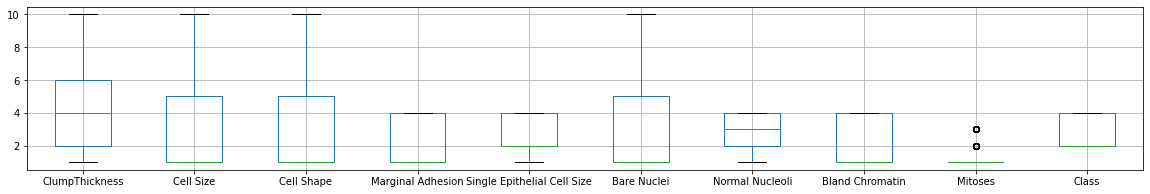

In [41]:
dataset.boxplot(figsize=(20,3))

In [ ]:
# We could see most of the outliers are now removed.

In [42]:
target_feature = dataset['Class']

In [44]:
target_feature.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [46]:
dataset.drop('Class',axis=1,inplace=True)

# Q6 Create a covariance matrix for identifying Principal components

In [ ]:
# PCA
# Step 1 - Create covariance matrix


In [47]:
from scipy.stats import zscore
dataset = dataset.apply(zscore)
dataset.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.206936,-0.699995,-0.743299,-0.776593,-0.612248,-0.686979,0.320648,-0.715534,-0.436962
1,0.206936,0.283845,0.266875,1.543230,1.460203,1.799664,0.320648,0.051580,-0.436962
2,-0.503866,-0.699995,-0.743299,-0.776593,-0.612248,-0.410685,0.320648,-0.715534,-0.436962
3,0.562336,1.595632,1.613773,-0.776593,0.423978,0.141902,0.320648,1.585807,-0.436962
4,-0.148465,-0.699995,-0.743299,0.769956,-0.612248,-0.686979,0.320648,-0.715534,-0.436962


In [48]:
cov=pd.DataFrame.cov(dataset)
# dataset.cov()

In [51]:
cov

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.001433,0.645836,0.655527,0.551514,0.587485,0.590853,0.544598,0.574417,0.426626
Cell Size,0.645836,1.001433,0.908181,0.715218,0.774815,0.687657,0.665899,0.727080,0.512723
Cell Shape,0.655527,0.908181,1.001433,0.697349,0.752997,0.708487,0.656279,0.718575,0.483351
Marginal Adhesion,0.551514,0.715218,0.697349,1.001433,0.692490,0.692541,0.600320,0.652850,0.424406
Single Epithelial Cell Size,0.587485,0.774815,0.752997,0.692490,1.001433,0.685040,0.632827,0.724033,0.466439
Bare Nuclei,0.590853,0.687657,0.708487,0.692541,0.685040,1.001433,0.642189,0.640359,0.453702
Normal Nucleoli,0.544598,0.665899,0.656279,0.600320,0.632827,0.642189,1.001433,0.650651,0.379527
Bland Chromatin,0.574417,0.727080,0.718575,0.652850,0.724033,0.640359,0.650651,1.001433,0.494160
Mitoses,0.426626,0.512723,0.483351,0.424406,0.466439,0.453702,0.379527,0.494160,1.001433


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [52]:
eig_vals,eig_vecs=np.linalg.eig(cov)

In [53]:
print(eig_vals)

[6.04389518 0.68744549 0.08941719 0.48875833 0.25593599 0.29502519
 0.32542678 0.42591832 0.40107151]


In [54]:
print(eig_vecs)

[[ 0.30732153  0.01872957  0.0171651   0.90989152 -0.07351399  0.07657967
  -0.22769475  0.07488734  0.09101476]
 [ 0.37046058 -0.04039208  0.72231664  0.01233766  0.11185712  0.09666323
   0.38423271 -0.28591253 -0.29664346]
 [ 0.36761658 -0.07862697 -0.67998448  0.06710247  0.23833845 -0.001833
   0.43088536 -0.28408632 -0.26195117]
 [ 0.33533943 -0.15504253 -0.04705311 -0.24737233 -0.00329256  0.64309279
  -0.22727553 -0.28498226  0.50364073]
 [ 0.35213576 -0.08484514 -0.06422354 -0.16833745 -0.78681415 -0.32145968
  -0.19954922 -0.22095466 -0.15901534]
 [ 0.33877986 -0.10557225  0.08362545 -0.07526106  0.2235452  -0.61262022
   0.16333506  0.10720527  0.63085494]
 [ 0.32019718 -0.24872056 -0.02602508 -0.13757808 -0.16011721  0.25041677
   0.21590645  0.81630011 -0.12124057]
 [ 0.34342963  0.00523136  0.01378857 -0.2022278   0.47575315 -0.15439846
  -0.66602962  0.09487578 -0.37170647]
 [ 0.24794438  0.94210605 -0.03722682 -0.11146236 -0.06511592  0.07767094
   0.08058955  0.1227386

# Q8 Find variance and cumulative variance by each eigen vector

In [56]:
total = sum(eig_vals)
var_exp = [(i/total) * 100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

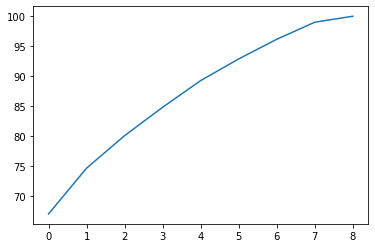

In [58]:
plt.plot(cum_var_exp)

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [59]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=9)
data_reduced = pca.fit_transform(dataset)
data_reduced.T


array([[-1.42913231e+00,  1.92028500e+00, -1.55397412e+00, ...,
         3.65628403e+00,  2.42753618e+00,  3.13360206e+00],
       [-1.59689140e-01, -1.07287161e+00, -2.02171090e-01, ...,
         2.05096780e-01, -1.13398121e+00, -1.30402013e+00],
       [-6.25941710e-01,  5.59145251e-01,  4.16045337e-02, ...,
         6.60188343e-01,  9.53610494e-01,  1.10365011e+00],
       ...,
       [-2.24628208e-01,  4.98278929e-01, -9.32172945e-04, ...,
        -4.75588126e-01, -9.32844048e-01, -4.29241782e-01],
       [ 3.03263106e-01,  6.69888489e-01,  1.89245136e-01, ...,
        -9.35394730e-02, -6.96835833e-01, -1.03791865e-01],
       [ 1.98343302e-02,  1.98450467e-02,  3.07385385e-02, ...,
        -1.15298462e-01,  4.29444018e-01, -7.19358431e-02]])

In [65]:
pca.explained_variance_

array([6.04389518, 0.68744549, 0.48875833, 0.42591832, 0.40107151,
       0.32542678, 0.29502519, 0.25593599, 0.08941719])

In [66]:
pca.explained_variance_ratio_

array([0.67058319, 0.07627356, 0.05422879, 0.04725656, 0.04449975,
       0.0361068 , 0.03273368, 0.02839665, 0.00992103])

# Q10 Find correlation between components and features

In [67]:
dataset_comp = pd.DataFrame(pca.components_,columns=list(dataset))

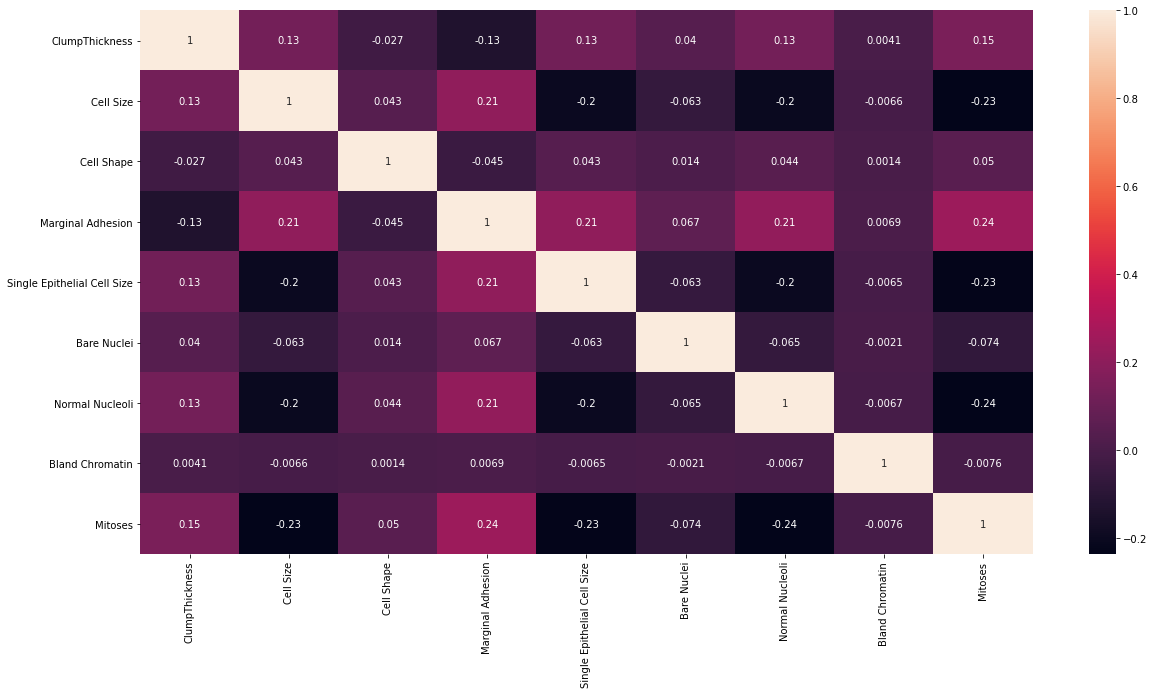

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset_comp.corr(),annot=True)
plt.show()